In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-coupon-redemption/test.csv
/kaggle/input/predicting-coupon-redemption/train/coupon_item_mapping.csv
/kaggle/input/predicting-coupon-redemption/train/customer_transaction_data.csv
/kaggle/input/predicting-coupon-redemption/train/campaign_data.csv
/kaggle/input/predicting-coupon-redemption/train/item_data.csv
/kaggle/input/predicting-coupon-redemption/train/customer_demographics.csv
/kaggle/input/predicting-coupon-redemption/train/train.csv


In [2]:
# Viewing training dataset
train_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/train.csv')
train_df

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0
...,...,...,...,...,...
78364,128587,8,71,1523,0
78365,128589,30,547,937,0
78366,128590,8,754,1004,0
78367,128592,13,134,71,0


In [3]:
#checking for null values in training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


In [4]:
# Viewing test dataset
test_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/test.csv')
test_df

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811
...,...,...,...,...
50221,128584,20,843,501
50222,128588,25,415,481
50223,128591,25,596,1336
50224,128593,22,518,748


In [5]:
# checking for null values in test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50226 entries, 0 to 50225
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           50226 non-null  int64
 1   campaign_id  50226 non-null  int64
 2   coupon_id    50226 non-null  int64
 3   customer_id  50226 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [6]:
#Customer demographics dataset
cus_dem_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/customer_demographics.csv')
cus_dem_df

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
...,...,...,...,...,...,...,...
755,1577,36-45,NaN,0,2,NaN,5
756,1578,46-55,Married,0,3,1,6
757,1579,46-55,NaN,0,1,NaN,4
758,1580,26-35,NaN,0,2,NaN,5


In [7]:
# checking for null values in customer demographics dataset
cus_dem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [8]:
#preprocessing dataset: replacing null values
cus_dem_df['no_of_children'].replace({np.NaN:0},inplace=True)
cus_dem_df['marital_status'].replace({np.NaN:'Unknown'},inplace=True)

In [9]:
# Again, checking for null values after preprocessing customer demographics dataset
cus_dem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  760 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  760 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [10]:
#Customer transaction dataset
cus_tsc_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/customer_transaction_data.csv')
cus_tsc_df

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0
...,...,...,...,...,...,...,...
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0


In [11]:
# checking for null values in customer transaction dataset
cus_tsc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [12]:
#Campaign dataset
camp_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/campaign_data.csv')
camp_df

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13


In [13]:
camp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    28 non-null     int64 
 1   campaign_type  28 non-null     object
 2   start_date     28 non-null     object
 3   end_date       28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [14]:
#Coupon item mapping Dataset
cpn_map_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/coupon_item_mapping.csv')
cpn_map_df

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77
...,...,...
92658,32,69268
92659,32,68502
92660,32,68612
92661,33,71390


In [15]:
cpn_map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [16]:
# Item Dataset
item_df=pd.read_csv('/kaggle/input/predicting-coupon-redemption/train/item_data.csv')
item_df

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery
...,...,...,...,...
74061,74062,5490,Established,Pharmaceutical
74062,74063,5497,Established,Pharmaceutical
74063,74064,5497,Established,Pharmaceutical
74064,74065,5520,Established,Pharmaceutical


In [17]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [18]:
# Merging coupon item mapping and item dataset
cpn_item_df=pd.merge(cpn_map_df,item_df,left_on='item_id',right_on='item_id')
cpn_item_df

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,6,37,56,Local,Grocery
2,22,37,56,Local,Grocery
3,31,37,56,Local,Grocery
4,107,75,56,Local,Grocery
...,...,...,...,...,...
92658,33,68764,3867,Established,Meat
92659,29,74013,5383,Established,Miscellaneous
92660,29,71965,4554,Established,Miscellaneous
92661,29,67815,4985,Established,Flowers & Plants


In [19]:
#datasets in use - [train_df, test_df, cus_dem_df, cus_tsc_df, camp_df, cpn_item_df]

In [20]:
# Merging training data with campaign data and then with coupon data(cpn_item_df)
train_camp_df = pd.merge(train_df,camp_df,left_on='campaign_id',right_on='campaign_id')
train_camp_cpn_df = pd.merge(train_camp_df, cpn_item_df, left_on='coupon_id', right_on='coupon_id')
train_camp_cpn_df

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,item_id,brand,brand_type,category
0,1,13,27,1053,0,X,19/05/13,05/07/13,1404,1636,Established,Grocery
1,1,13,27,1053,0,X,19/05/13,05/07/13,1418,1105,Established,Grocery
2,1,13,27,1053,0,X,19/05/13,05/07/13,1449,1636,Established,Grocery
3,1,13,27,1053,0,X,19/05/13,05/07/13,1515,1105,Established,Grocery
4,1,13,27,1053,0,X,19/05/13,05/07/13,1532,1636,Established,Grocery
...,...,...,...,...,...,...,...,...,...,...,...,...
6420689,126179,1,562,787,0,Y,12/12/12,18/01/13,65961,360,Established,Grocery
6420690,126179,1,562,787,0,Y,12/12/12,18/01/13,66016,360,Established,Grocery
6420691,126179,1,562,787,0,Y,12/12/12,18/01/13,66035,360,Established,Grocery
6420692,126179,1,562,787,0,Y,12/12/12,18/01/13,66048,360,Established,Grocery


In [21]:
train_camp_cpn_df['end_date'].unique(),train_camp_cpn_df['start_date'].unique()

(array(['05/07/13', '21/09/12', '04/01/13', '30/11/12', '05/04/13',
        '18/01/13', '16/02/13', '27/10/12', '12/04/13', '24/05/13',
        '08/03/13', '16/11/12', '07/06/13', '15/02/13', '10/05/13',
        '08/02/13', '01/03/13'], dtype=object),
 array(['19/05/13', '12/08/12', '19/11/12', '08/10/12', '16/02/13',
        '17/12/12', '12/12/12', '22/12/12', '25/08/12', '11/03/13',
        '22/04/13', '02/02/13', '16/09/12', '12/01/13', '08/04/13',
        '07/01/13', '28/01/13'], dtype=object))

In [22]:
# checking for duplicate values
train_camp_cpn_df.duplicated().values.any()

False

In [23]:
train_camp_cpn_df.corr()

,id,campaign_id,coupon_id,customer_id,redemption_status,item_id,brand
id,1.000000,-0.003800,0.028301,-0.023722,-0.020739,-0.007917,-0.014988
campaign_id,-0.003800,1.000000,0.202651,0.004806,-0.016143,-0.001028,-0.032331
coupon_id,0.028301,0.202651,1.000000,0.020851,-0.071106,-0.030766,-0.120404
customer_id,-0.023722,0.004806,0.020851,1.000000,0.030729,-0.001362,-0.007618
redemption_status,-0.020739,-0.016143,-0.071106,0.030729,1.000000,-0.008067,-0.010415
item_id,-0.007917,-0.001028,-0.030766,-0.001362,-0.008067,1.000000,0.128855
brand,-0.014988,-0.032331,-0.120404,-0.007618,-0.010415,0.128855,1.000000


In [24]:
train_camp_cpn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6420694 entries, 0 to 6420693
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   campaign_id        int64 
 2   coupon_id          int64 
 3   customer_id        int64 
 4   redemption_status  int64 
 5   campaign_type      object
 6   start_date         object
 7   end_date           object
 8   item_id            int64 
 9   brand              int64 
 10  brand_type         object
 11  category           object
dtypes: int64(7), object(5)
memory usage: 636.8+ MB


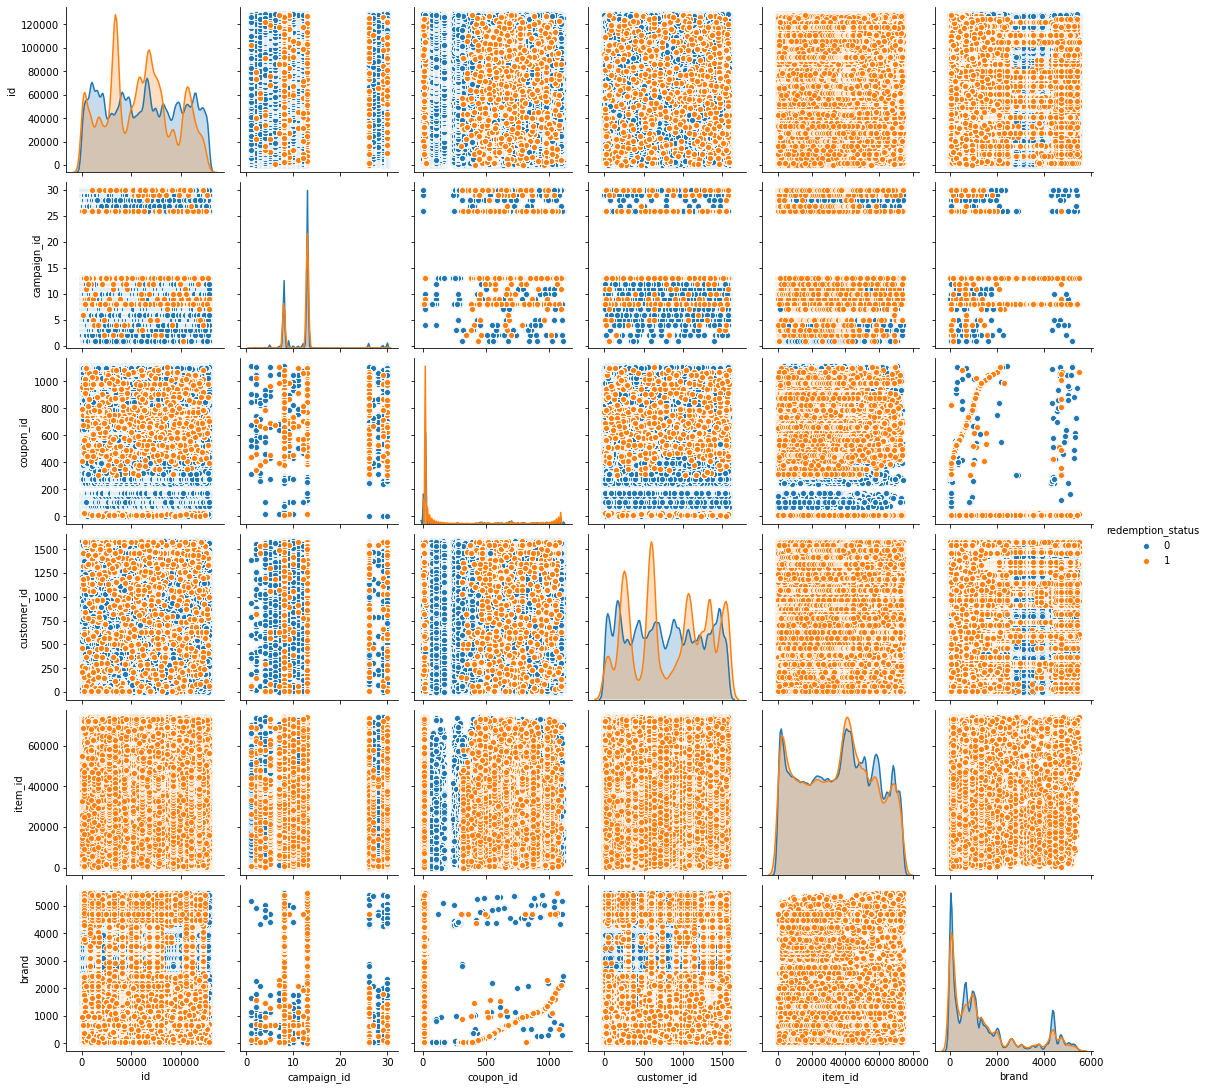

In [25]:
import seaborn as sns 
sns.pairplot(train_camp_cpn_df,hue='redemption_status')

In [26]:
# Merging test data with campaign data and then with coupon data(cpn_item_df)
test_camp_df = pd.merge(test_df,camp_df,left_on='campaign_id',right_on='campaign_id')
test_camp_cpn_df = pd.merge(test_camp_df, cpn_item_df, left_on='coupon_id', right_on='coupon_id')
test_camp_cpn_df

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,item_id,brand,brand_type,category
0,3,22,869,967,X,16/09/13,18/10/13,1033,1075,Established,Grocery
1,3,22,869,967,X,16/09/13,18/10/13,1067,1075,Established,Grocery
2,3,22,869,967,X,16/09/13,18/10/13,1084,1075,Established,Grocery
3,3,22,869,967,X,16/09/13,18/10/13,1124,1075,Established,Grocery
4,3,22,869,967,X,16/09/13,18/10/13,1125,1075,Established,Grocery
...,...,...,...,...,...,...,...,...,...,...,...
5421796,127955,24,43,800,Y,21/10/13,20/12/13,73885,5147,Established,Grocery
5421797,127955,24,43,800,Y,21/10/13,20/12/13,73906,2074,Established,Grocery
5421798,127955,24,43,800,Y,21/10/13,20/12/13,73922,2074,Established,Grocery
5421799,127955,24,43,800,Y,21/10/13,20/12/13,73975,2074,Established,Grocery


In [27]:
#Training model using RandomForestClassifier for last 18 years based on just campaign and coupon data
# without using categorical data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score



X=train_camp_cpn_df[['id', 'campaign_id', 'coupon_id', 'customer_id', 'item_id', 'brand']]
y=train_camp_cpn_df['redemption_status']

X_train,X_test,y_train,y_test=train_test_split(X,y)

model1=RandomForestClassifier(n_estimators=10, 
                               random_state=50, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1).fit(X_train,y_train)

print("Training data score:", model1.score(X_train,y_train),"\nTest data score:", model1.score(X_test,y_test),"\nPrecision_score of test data:", precision_score(y_test,model1.predict(X_test)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.9s finished


Training data score: 0.9999981310429611 
Test data score: 0.9999545220642746 
Precision_score of test data: 0.9999871314776925


In [28]:
#Prediciting coupon redemption for next 10 years without using categorical data
prediction=model1.predict(test_camp_cpn_df[['id', 'campaign_id', 'coupon_id', 'customer_id', 'item_id', 'brand']])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    2.1s finished


In [29]:
# No. of coupons redeemed v/s No. of coupons not redeemed
sum([1 for i in prediction if i==1]),sum([1 for i in prediction if i==0])

(15631, 5406170)

Text(0.5, 1.0, 'Coupons Redeemed v/s Coupons not Redeemed: \n(0 - Coupon not redeemed, 1 - Coupon redeemed)')

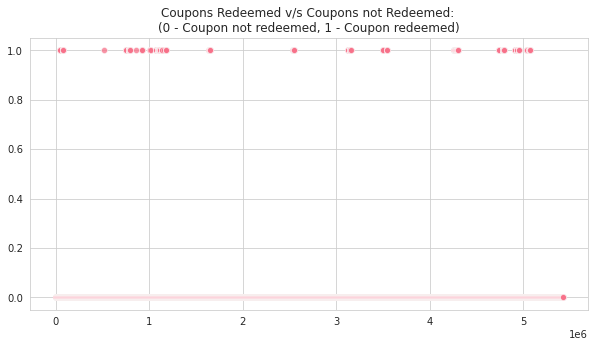

In [30]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.figure(figsize=(10,5))
sns.scatterplot(np.arange(len(prediction)),prediction,alpha=0.5)

plt.gca().set_title('Coupons Redeemed v/s Coupons not Redeemed: \n(0 - Coupon not redeemed, 1 - Coupon redeemed)')

In [31]:
#Training model using RandomForestClassifier for last 18 years based on just campaign and coupon data
# using categorical data

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

#one_hot_encoding for handling categorical data
train_predictor=pd.get_dummies(train_camp_cpn_df)
test_predictor=pd.get_dummies(test_camp_cpn_df)

final_train, final_test = train_predictor.align(test_predictor,join='inner', axis=1)

X=final_train[['id', 'campaign_id', 'coupon_id', 'customer_id', 'item_id', 'brand',
       'campaign_type_X', 'campaign_type_Y', 'brand_type_Established',
       'brand_type_Local', 'category_Bakery',
       'category_Dairy, Juices & Snacks', 'category_Flowers & Plants',
       'category_Garden', 'category_Grocery', 'category_Meat',
       'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Salads', 'category_Seafood',
       'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)']]
       
y=train_camp_cpn_df['redemption_status']

X_train,X_test,y_train,y_test=train_test_split(X,y)

model=RandomForestClassifier(n_estimators=10, 
                            random_state=50, 
                            max_features = 'sqrt',
                            n_jobs=-1, verbose = 1).fit(X_train,y_train)

print("Training data score:", model.score(X_train,y_train),"\nTest data score:", model.score(X_test,y_test),"\nPrecision_score of test data:", precision_score(y_test,model.predict(X_test)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    4.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.5s finished


Training data score: 0.9999854636674752 
Test data score: 0.9997969067527882 
Precision_score of test data: 0.999832136769795


In [32]:
train_camp_cpn_df.shape,final_train.shape

((6420694, 12), (6420694, 26))

In [33]:
test_camp_cpn_df.shape,final_test.shape

((5421801, 11), (5421801, 26))

In [34]:
final_train.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'item_id', 'brand',
       'campaign_type_X', 'campaign_type_Y', 'brand_type_Established',
       'brand_type_Local', 'category_Bakery',
       'category_Dairy, Juices & Snacks', 'category_Flowers & Plants',
       'category_Garden', 'category_Grocery', 'category_Meat',
       'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Salads', 'category_Seafood',
       'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)'],
      dtype='object')

In [35]:
final_test.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'item_id', 'brand',
       'campaign_type_X', 'campaign_type_Y', 'brand_type_Established',
       'brand_type_Local', 'category_Bakery',
       'category_Dairy, Juices & Snacks', 'category_Flowers & Plants',
       'category_Garden', 'category_Grocery', 'category_Meat',
       'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Salads', 'category_Seafood',
       'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)'],
      dtype='object')

In [36]:
#Prediciting coupon redemption for next 10 years using categorical data
predictions=model.predict(final_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    2.3s finished


In [37]:
# No. of coupons redeemed v/s No. of coupons not redeemed
sum([1 for i in predictions if i==1]),sum([1 for i in predictions if i==0])

(4539, 5417262)

Text(0.5, 1.0, 'Coupons Redeemed v/s Coupons not Redeemed: \n(0 - Coupon not redeemed, 1 - Coupon redeemed)')

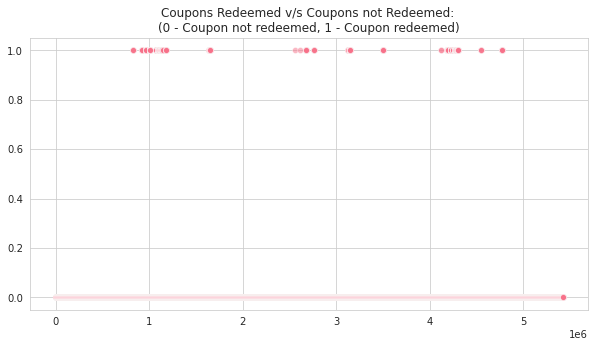

In [38]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.figure(figsize=(10,5))
sns.scatterplot(np.arange(len(predictions)),predictions,alpha=0.5)

plt.gca().set_title('Coupons Redeemed v/s Coupons not Redeemed: \n(0 - Coupon not redeemed, 1 - Coupon redeemed)')

In [39]:
# Next, Merging training data with cus_tsc_df (customer transaction dataset)
#train_tsc_df = pd.merge(train_df , cus_tsc_df ,left_on = 'customer_id',right_on='customer_id')
#train_tsc_df

In [40]:
#checking for duplicate values
#train_tsc_df.duplicated().values.any()

In [41]:
# Next, Merging training data with cus_dem_df (customer demographics dataset)
#train_dem_df = pd.merge(train_df , cus_dem_df ,left_on = 'customer_id',right_on='customer_id')
#train_dem_df

In [42]:
#checking for duplicate values
#train_dem_df.duplicated().values.any()